In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [66]:
#df = pd.read_csv('C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/hitters.csv')

train = pd.read_csv('C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/titanic/train.csv')
test  = pd.read_csv('C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/titanic/test.csv')


#df.describe()
train.head()
#test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#Creating a sigmoid (outputs differnt probabilites)

def sigmoid(x):
    return 1/(1+np.exp(-x))


sigmoid(-5)

0.0066928509242848554

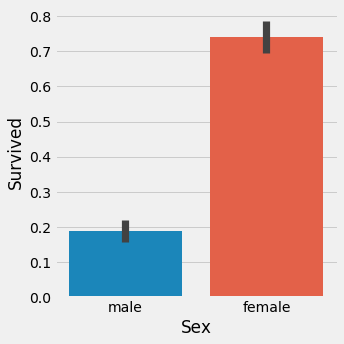

In [13]:
import seaborn as sns

sns.catplot(x='Sex', y='Survived', kind='bar', data=train);

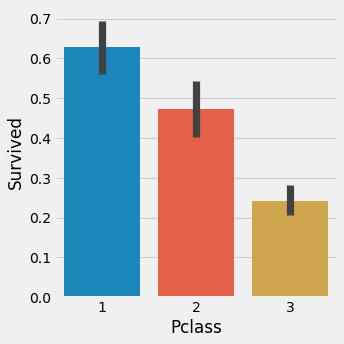

In [14]:
sns.catplot(x='Pclass', y='Survived', kind='bar', data=train);

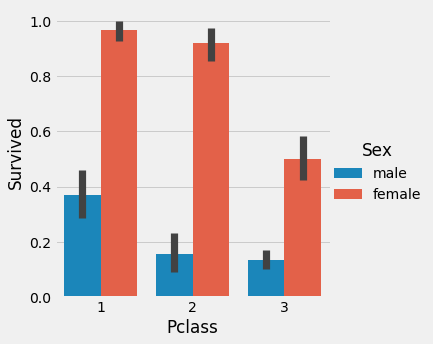

In [15]:
sns.catplot(x='Pclass', y='Survived', kind='bar', hue='Sex', data=train);

In [67]:
X_train = train.loc[:, ['Sex', 'Pclass']]
y_train = train['Survived']
X_test  = test.loc[:, ['Sex', 'Pclass']]

X_train = pd.get_dummies(X_train, columns=['Sex', 'Pclass'], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=['Sex', 'Pclass'], drop_first=True)

In [26]:
# set multi_class to 'obr' for multi-class regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
# you can then use the predict method to predic out of sample data
logreg.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
logreg.predict_proba(X_test)

array([[0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.75093089, 0.24906911],
       [0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.75093089, 0.24906911],
       [0.41462909, 0.58537091],
       [0.89503473, 0.10496527],
       [0.89503473, 0.10496527],
       [0.60521334, 0.39478666],
       [0.11295975, 0.88704025],
       [0.75093089, 0.24906911],
       [0.11295975, 0.88704025],
       [0.20028547, 0.79971453],
       [0.75093089, 0.24906911],
       [0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.41462909, 0.58537091],
       [0.60521334, 0.39478666],
       [0.89503473, 0.10496527],
       [0.11295975, 0.88704025],
       [0.60521334, 0.39478666],
       [0.11295975, 0.88704025],
       [0.89503473, 0.10496527],
       [0.11295975, 0.88704025],
       [0.89503473, 0.10496527],
       [0.60521334, 0.39478666],
       [0.89503473, 0.10496527],
       [0.

In [49]:
logreg.predict_proba(X_test)[:, 1]

array([0.10496527, 0.58537091, 0.24906911, 0.10496527, 0.58537091,
       0.10496527, 0.58537091, 0.24906911, 0.58537091, 0.10496527,
       0.10496527, 0.39478666, 0.88704025, 0.24906911, 0.88704025,
       0.79971453, 0.24906911, 0.10496527, 0.58537091, 0.58537091,
       0.39478666, 0.10496527, 0.88704025, 0.39478666, 0.88704025,
       0.10496527, 0.88704025, 0.10496527, 0.39478666, 0.10496527,
       0.24906911, 0.24906911, 0.58537091, 0.58537091, 0.39478666,
       0.10496527, 0.58537091, 0.58537091, 0.10496527, 0.10496527,
       0.10496527, 0.39478666, 0.10496527, 0.79971453, 0.88704025,
       0.10496527, 0.39478666, 0.10496527, 0.88704025, 0.58537091,
       0.39478666, 0.24906911, 0.79971453, 0.88704025, 0.24906911,
       0.10496527, 0.10496527, 0.10496527, 0.10496527, 0.88704025,
       0.10496527, 0.24906911, 0.10496527, 0.58537091, 0.39478666,
       0.79971453, 0.58537091, 0.39478666, 0.39478666, 0.88704025,
       0.58537091, 0.10496527, 0.58537091, 0.39478666, 0.88704

In [31]:
logreg.intercept_

array([2.06085883])

In [32]:
logreg.coef_

array([[-2.48809433, -0.67634771, -1.7159975 ]])

In [33]:
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Weight'  : logreg.coef_[0]
})

coeffs

,Variable,Weight
0,Sex_male,-2.488094
1,Pclass_2,-0.676348
2,Pclass_3,-1.715997


In [44]:
# let's create a variable called output that recreates the predictions
output = X_train.dot(logreg.coef_.T) + logreg.intercept_

In [45]:
#sigmoid(output)

In [37]:
# now let's submit predictions for logisitc regression model
preds = logreg.predict(X_test)

lm_predictions = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived'   : preds
})

In [38]:
lm_predictions.to_csv('C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/titanic/lm_submissions.csv', index=False)

##Random forest time

In [80]:
X_train = train.loc[:, ['Sex', 'Pclass']]
y_train = train['Survived']
X_test  = test.loc[:, ['Sex', 'Pclass']]

X_train = pd.get_dummies(X_train, columns=['Sex', 'Pclass'], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=['Sex', 'Pclass'], drop_first=True)

In [91]:
#random forest classifer
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [92]:
# and we'll fit a quick model
rf.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
#importance = add up to 1

rf.feature_importances_

array([0.71742621, 0.02076416, 0.26180963])

In [94]:
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf.feature_importances_
})

importances

,Features,Importance
0,Sex_male,0.717426
1,Pclass_2,0.020764
2,Pclass_3,0.261810


In [95]:
rf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
rf.predict_proba(X_test)

array([[0.86062739, 0.13937261],
       [0.49467221, 0.50532779],
       [0.84992278, 0.15007722],
       [0.86062739, 0.13937261],
       [0.49467221, 0.50532779],
       [0.86062739, 0.13937261],
       [0.49467221, 0.50532779],
       [0.84992278, 0.15007722],
       [0.49467221, 0.50532779],
       [0.86062739, 0.13937261],
       [0.86062739, 0.13937261],
       [0.60634336, 0.39365664],
       [0.04007543, 0.95992457],
       [0.84992278, 0.15007722],
       [0.04007543, 0.95992457],
       [0.06732416, 0.93267584],
       [0.84992278, 0.15007722],
       [0.86062739, 0.13937261],
       [0.49467221, 0.50532779],
       [0.49467221, 0.50532779],
       [0.60634336, 0.39365664],
       [0.86062739, 0.13937261],
       [0.04007543, 0.95992457],
       [0.60634336, 0.39365664],
       [0.04007543, 0.95992457],
       [0.86062739, 0.13937261],
       [0.04007543, 0.95992457],
       [0.86062739, 0.13937261],
       [0.60634336, 0.39365664],
       [0.86062739, 0.13937261],
       [0.

In [97]:
rf_preds = rf.predict(X_test)

In [98]:
# pass them into a dataframe
rf_submissions = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived'   : rf_preds
})

In [99]:
rf_submissions.to_csv('C:/Users/James.Kelly/DAT-06-24/class material/Unit 3/data/titanic/rf_submissions.csv', index=False)

In [ ]:
#grid Searches

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# set up the parameters of the model you'd like to fit
param_grid = {
    'penalty': ['l1', 'l2'],
    'C'      : [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
}

In [102]:
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)

In [103]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [105]:
# and best of all, the results of all your cross-validation
grid_results = pd.DataFrame(grid.cv_results_);

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessi

In [106]:
grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005757,0.005960,0.001751,0.001564,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
1,0.002399,0.000492,0.001602,0.001013,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
2,0.003800,0.001006,0.001454,0.000469,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
3,0.002953,0.000931,0.001705,0.001793,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
4,0.002605,0.000660,0.001102,0.000300,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317


In [107]:
# every column returned by our new dataframe
grid_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [108]:
# let's trim this up a bit
cols = ['param_C', 'param_penalty', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_train_score', 'std_train_score']
grid_results = grid_results.loc[:, cols]

In [109]:
grid_results.sort_values(by='rank_test_score')

,param_C,param_penalty,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,1,l1,0.786756,0.027926,1,0.786756,0.003101
15,1000,l2,0.786756,0.027926,1,0.786756,0.003101
14,1000,l1,0.786756,0.027926,1,0.786756,0.003101
13,100,l2,0.786756,0.027926,1,0.786756,0.003101
12,100,l1,0.786756,0.027926,1,0.786756,0.003101
11,10,l2,0.786756,0.027926,1,0.786756,0.003101
10,10,l1,0.786756,0.027926,1,0.786756,0.003101
9,1,l2,0.786756,0.027926,1,0.786756,0.003101
17,10000,l2,0.786756,0.027926,1,0.786756,0.003101
7,0.1,l2,0.786756,0.027926,1,0.786756,0.003101
